In [15]:
# библеотеки для работы с PDF
# pyPDF2 / pyMuPDF (fitz) / ReportLab / PyFPDF: data -> PDF
# pdfminer / pdfminer.six / pdfquery: PDF -> data
# pyhtmldoc / xhtml2pdf / pdfkit: (data ->) HTML -> PDF
from reportlab.pdfgen import canvas
from reportlab.lib import pagesizes
from reportlab.pdfbase import pdfmetrics
#from reportlab.pdfbase.ttfonts import TTFont

PDF = canvas.Canvas("title.pdf", pagesize = pagesizes.A4)
print (PDF.getAvailableFonts())
#pdfmetrics.registerFont(TTFont("Trebuchet", "Trebuchet.ttf"))
PDF.setFont("Helvetica", 13)
PDF.drawString(30, 820, "Dmitri Gornakov")
PDF.drawString(197, 820, "Python PDF")
PDF.drawString(430, 20, "DIGO.ee")
PDF.drawString(550, 820, "1")
PDF.setFont("Helvetica-Bold", 48)
PDF.drawString(180, 550, "Finans")
PDF.drawString(185, 490, "Statistic")
PDF.drawString(215, 430, "HOOANDJA.ee")
PDF.save()


['Courier', 'Courier-Bold', 'Courier-BoldOblique', 'Courier-Oblique', 'Helvetica', 'Helvetica-Bold', 'Helvetica-BoldOblique', 'Helvetica-Oblique', 'Symbol', 'Times-Bold', 'Times-BoldItalic', 'Times-Italic', 'Times-Roman', 'ZapfDingbats']


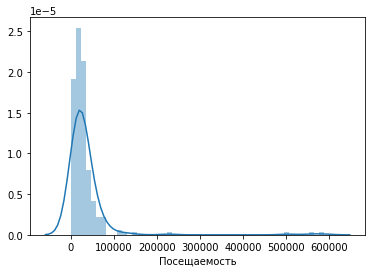

In [55]:
#Добавление информации в PDF
from reportlab.pdfgen import canvas
from reportlab.lib import pagesizes
from reportlab.pdfbase import pdfmetrics
from reportlab.pdfbase.ttfonts import TTFont
from reportlab.lib.utils import ImageReader
import requests
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#подключение файла с локального серв
r = requests.get("https://video.ittensive.com/python-advanced/data-7361-2019-11-28.utf.json")
data = pd.DataFrame(json.loads(r.content),
                   columns = ["NumOfVisitors", "CommonName"]).fillna(value=0)
sns.distplot(data["NumOfVisitors"]).set(xlabel="Посещаемость")
plt.savefig('libraries.png')

#pdfmetrics.registerFont(TTFont('Trebuchet', 'Trebuchet.ttf'))
PDF = canvas.Canvas("libraries.pdf", pagesize=pagesizes.A4)
PDF.setFont("Courier", 48)
PDF.drawString(100, 650, "Moscow Libraries")
PDF.setFont("Courier", 13)
PDF.drawString(550, 820, "2")
PDF.drawImage(ImageReader("libraries.png"), 100, 300)
PDF.save()

In [72]:
#Преобразование PDF
from PyPDF2 import PdfFileMerger, PdfFileReader
from PIL import Image

with open("title.pdf", "rb") as pdf_file:
    pdf_reader = PdfFileReader(pdf_file)
    print("Число страниц", pdf_reader.getNumPages())
    print("Metadata", pdf_reader.documentInfo)
    print("File Author", pdf_reader.documentInfo["/Author"])
    print("File Creator", pdf_reader.documentInfo["/Creator"])
    

with open("libraries.pdf", "rb") as pdf_file:
    pdf_reader = PdfFileReader(pdf_file)
    for page_num in range(pdf_reader.numPages):
        pdf_page = pdf_reader.getPage(page_num)
        if '/XObject' in pdf_page['/Resources']:
            xObject = pdf_page['/Resources']['/XObject'].getObject()
            for obj in xObject:
                if xObject[obj]['/Subtype'] == '/Image':
                    size = (xObject[obj]['/Width'], xObject[obj]['/Height'])
                    data = xObject[obj].getData()
                    img = Image.frombytes("RGB", size, data)
                    img.save("image.png")

files = ["title.pdf", "libraries.pdf"]
merger = PdfFileMerger()
for filename in files:
    merger.append(PdfFileReader(open(filename, "rb")))
merger.addMetadata({
    '/Producer': "ITtensive",
    '/Author': "ITtensive",
    '/Creator': "ITtensive Python Advanced - www.ittensive.com",
    '/Copyright': "ITtensive 2019",
    '/Title': "Культурная статистика Москвы"
})
merger.write("report.pdf")



Число страниц 1
Metadata {'/Author': 'anonymous', '/CreationDate': "D:20200607181912-02'00'", '/Creator': 'ReportLab PDF Library - www.reportlab.com', '/Keywords': '', '/ModDate': "D:20200607181912-02'00'", '/Producer': 'ReportLab PDF Library - www.reportlab.com', '/Subject': 'unspecified', '/Title': 'untitled', '/Trapped': '/False'}
File Author anonymous
File Creator ReportLab PDF Library - www.reportlab.com


UnsupportedOperation: can't do nonzero end-relative seeks

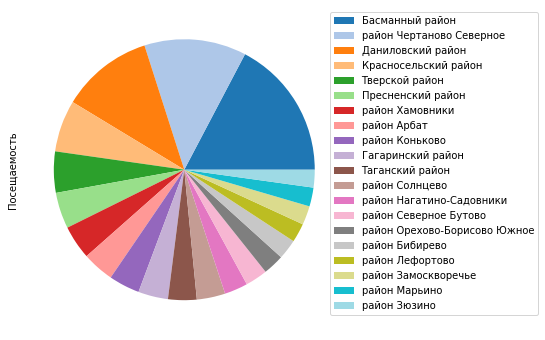

In [71]:
from reportlab.pdfgen import canvas
from reportlab.lib import pagesizes
from reportlab.pdfbase import pdfmetrics
from reportlab.pdfbase.ttfonts import TTFont
from PyPDF2 import PdfFileMerger, PdfFileReader
from reportlab.lib.utils import ImageReader
import seaborn as sns
import json
import requests
import pandas as pd
import matplotlib.pyplot as plt


def extract_district(x):
    return list(map(lambda a: a["District"], x))[0]


home_dir = ''

r = requests.get(
    "https://video.ittensive.com/python-advanced/data-7361-2019-11-28.utf.json")

data = pd.DataFrame(json.loads(r.content)).fillna(value=0)
data["District"] = data["ObjectAddress"].apply(extract_district)
data_sum = data.groupby("District").sum().sort_values(
    "NumOfVisitors", ascending=False)

fig = plt.figure(figsize=(11, 6))
area = fig.add_subplot(1, 1, 1)
data_sum[0:20]["NumOfVisitors"].plot.pie(
    ax=area, labels=[""]*20, label="Посещаемость", cmap="tab20")

plt.legend(data_sum[0:20].index, bbox_to_anchor=(1.5, 1, 0.1, 0))
plt.savefig(home_dir + "readers.png")

 #pdfmetrics.registerFont(TTFont("Trebuchet", home_dir + "fonts/Trebuchet.ttf"))
PDF = canvas.Canvas(home_dir + "readers.pdf", pagesize=pagesizes.A4)

PDF.setFont("Courier", 48)
PDF.drawString(70, 650, "Посетители библиотек")
PDF.drawString(80, 590, "По районам Москвы")

PDF.setFont("Courier", 13)
PDF.drawString(550, 820, "2")
PDF.drawImage(ImageReader(home_dir + "readers.png"), -200, 150)

PDF.setFont("Courier", 20)
PDF.drawString(100, 150, "Самый популярный район")

PDF.setFont("Courier", 24)
 #PDF.drawString(100, 120, data_sum.index.get_values()[0])

PDF.setFont("Courier", 20)
PDF.drawString(100, 90, "Посетители" +
               str(int(data_sum["NumOfVisitors"].values[0])))

PDF.save()

files = [home_dir + "title.pdf", home_dir + "readers.pdf"]
merger = PdfFileMerger()

for filename in files:
    merger.append(PdfFileReader(open(filename), "rb"))

merger.write("report.pdf")
